In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


**Loading** **Dataset**

In [ ]:
wine_dataset = pd.read_csv('/content/winequality-white.csv',sep=';')

In [ ]:
# number of rows & columns in the dataset
wine_dataset.shape

(4898, 12)

In [ ]:
# first 5 rows of the dataset
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# checking for missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


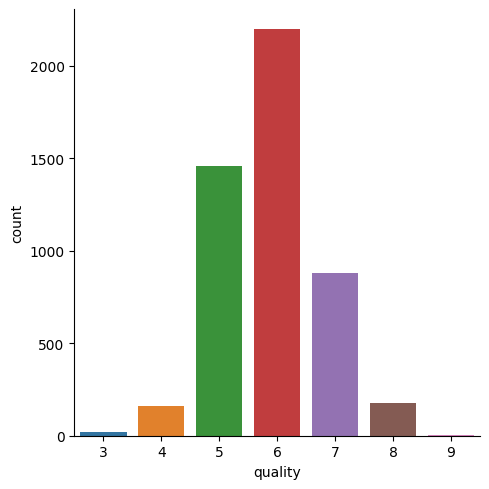

In [ ]:
# number of values for each quality
sns.catplot(x='quality', data = wine_dataset, kind = 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

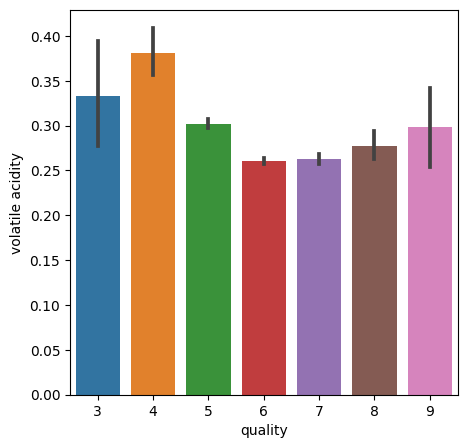

In [ ]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

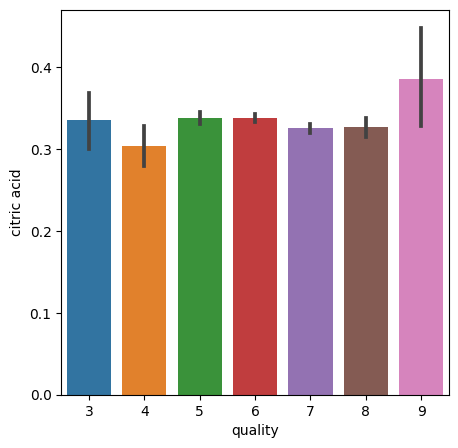

In [ ]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = wine_dataset)

<Axes: xlabel='quality', ylabel='pH'>

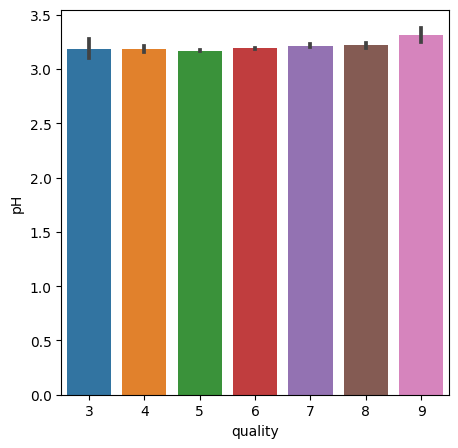

In [ ]:
# pH vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'pH', data = wine_dataset)

<Axes: xlabel='quality', ylabel='alcohol'>

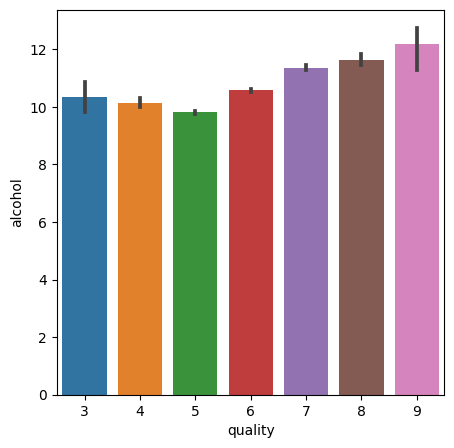

In [ ]:
# alcohol vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'alcohol', data = wine_dataset)

**Correlation**

In [ ]:
correlation = wine_dataset.corr()

<Axes: >

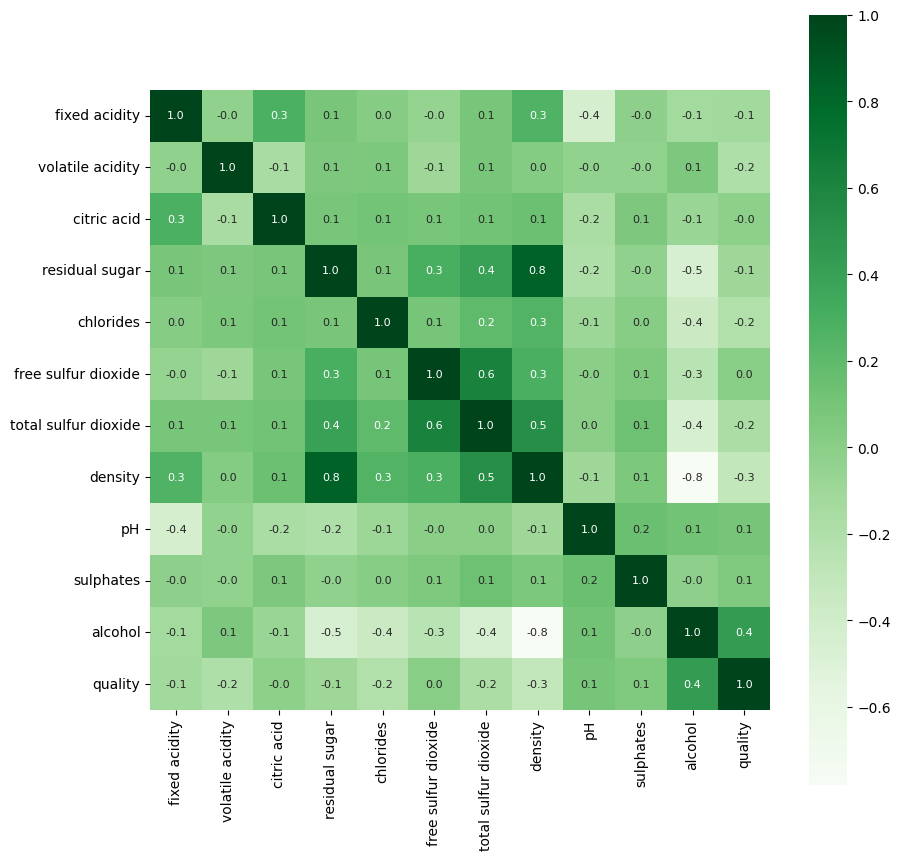

In [ ]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Greens')

## **Data** **Preprocessing**

In [ ]:
# separate the data and Label
X = wine_dataset.drop('quality',axis=1)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

**`Label`** **`Binarization`**

In [ ]:
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
4893    0
4894    0
4895    0
4896    1
4897    0
Name: quality, Length: 4898, dtype: int64


In [ ]:
Y.value_counts()

0    3838
1    1060
Name: quality, dtype: int64

<Axes: ylabel='count'>

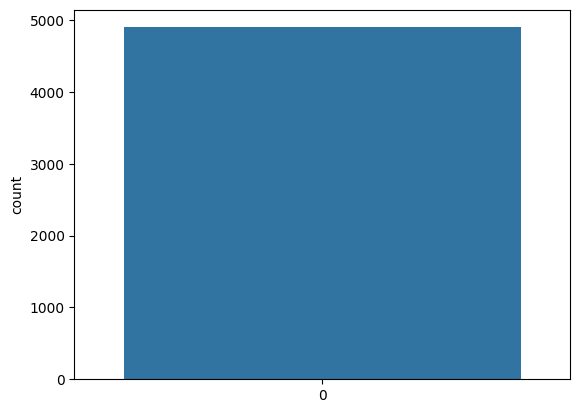

In [ ]:
sns.countplot(Y)

### **Train & Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)

(4898,) (3918,) (980,)


## Model Training & Evaluation:


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(random_state=1)
model1.fit(X_train, Y_train)
y_pred1 = model1.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred1))

from sklearn.metrics import f1_score
print( 'F1 Score:' , f1_score(Y_test, y_pred1))

from sklearn.metrics import precision_score
print( 'precision:' , precision_score(Y_test, y_pred1))

from sklearn.metrics import recall_score
print( 'recall:' , recall_score(Y_test, y_pred1))

Accuracy Score: 0.8683673469387755
F1 Score: 0.6734177215189874
precision: 0.7869822485207101
recall: 0.588495575221239


## LogisticRegression:

In [ ]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(X_train,Y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))

from sklearn.metrics import f1_score
print( 'F1 Score:' , f1_score(Y_test, y_pred2))

from sklearn.metrics import precision_score
print( 'precision:' , precision_score(Y_test, y_pred2))

from sklearn.metrics import recall_score
print( 'recall:' , recall_score(Y_test, y_pred2))

Accuracy Score: 0.7948979591836735
F1 Score: 0.38905775075987836
precision: 0.6213592233009708
recall: 0.2831858407079646


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Using KNN:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors=3)
model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred3))

from sklearn.metrics import f1_score
print( 'F1 Score:' , f1_score(Y_test, y_pred3))

from sklearn.metrics import precision_score
print( 'precision:' , precision_score(Y_test, y_pred3))

from sklearn.metrics import recall_score
print( 'recall:' , recall_score(Y_test, y_pred3))

Accuracy Score: 0.7744897959183673
F1 Score: 0.4824355971896956
precision: 0.5124378109452736
recall: 0.4557522123893805


## Using SVC:

In [ ]:
from sklearn.svm import SVC
model4 = SVC()
model4.fit(X_train,Y_train)
y_pred4 = model4.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred4))

from sklearn.metrics import f1_score
print( 'F1 Score:' , f1_score(Y_test, y_pred4))

from sklearn.metrics import precision_score
print( 'precision:' , precision_score(Y_test, y_pred4))

from sklearn.metrics import recall_score
print( 'recall:' , recall_score(Y_test, y_pred4))

Accuracy Score: 0.7693877551020408
F1 Score: 0.0
precision: 0.0
recall: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Using GaussianNB:

In [ ]:
from sklearn.naive_bayes import GaussianNB
model5 = GaussianNB()
model5.fit(X_train,Y_train)
y_pred5 = model5.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred5))

from sklearn.metrics import f1_score
print( 'F1 Score:' , f1_score(Y_test, y_pred5))

from sklearn.metrics import precision_score
print( 'precision:' , precision_score(Y_test, y_pred5))

from sklearn.metrics import recall_score
print( 'recall:' , recall_score(Y_test, y_pred5))

Accuracy Score: 0.7091836734693877
F1 Score: 0.5410628019323672
precision: 0.4253164556962025
recall: 0.7433628318584071


## Using Xgboost:

In [ ]:
import xgboost as xgb
model6 = xgb.XGBClassifier(random_state=1)
model6.fit(X_train, Y_train)
y_pred6 = model6.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred6))

from sklearn.metrics import f1_score
print( 'F1 Score:' , f1_score(Y_test, y_pred6))

from sklearn.metrics import precision_score
print( 'precision:' , precision_score(Y_test, y_pred6))

from sklearn.metrics import recall_score
print( 'recall:' , recall_score(Y_test, y_pred6))

Accuracy Score: 0.8622448979591837
F1 Score: 0.6838407494145199
precision: 0.7263681592039801
recall: 0.6460176991150443


In [ ]:
from sklearn.naive_bayes import MultinomialNB
model8 = MultinomialNB()
model8.fit(X_train,Y_train)
y_pred8 = model8.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred8))

from sklearn.metrics import f1_score
print( 'F1 Score:' , f1_score(Y_test, y_pred8))

from sklearn.metrics import precision_score
print( 'precision:' , precision_score(Y_test, y_pred8))

from sklearn.metrics import recall_score
print( 'recall:' , recall_score(Y_test, y_pred8))

In [ ]:
results = pd.DataFrame({
    'Model': ['Random Forest','Logistic Regression', 'KNN','SVC' ,'GaussianNB','Xgboost'],
    'Score': [0.9281,0.9,0.8875,0.8843,0.8562,0.9218]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, activation ='relu', input_shape =(11, )))
model.add(Dense(9, activation ='relu'))
model.add(Dense(1, activation ='sigmoid'))
model.output_shape

model.summary()

model.get_config()

model.get_weights()
model.compile(loss ='binary_crossentropy',
optimizer ='adam', metrics =['accuracy'])


In [ ]:
# Training Model
history=model.fit(X_train, Y_train, validation_split=0.1,epochs = 20,
		batch_size = 1, verbose = 1)

# Predicting the Value
y_pred = model.predict(X_test)
print(y_pred)


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('val_accuracy')

plt.legend(['training data', 'validation data'], loc = 'lower right')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,validation_split=0.1,epochs=10)

In [ ]:
plt.plot(history.history['loss'], label='MAE training data')
plt.plot(history.history['val_loss'], label='MAE validation data')
plt.legend()
plt.title('MAE for model')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy training data')
plt.plot(history.history['val_accuracy'], label='Accuracy validation data')
plt.legend()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()